In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train_0irEZ2H.csv')
test = pd.read_csv('test_nfaJ3J5.csv')

In [3]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
train.shape, test.shape

((150150, 9), (13860, 8))

In [5]:
train.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [6]:
combine = train.append(test)
combine.shape

C:\Users\hungu\anaconda.x\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(164010, 9)

In [7]:
combine['week'] = pd.to_datetime(combine['week'], format='%d/%m/%y')
combine['Year'] = combine.week.dt.year
combine['Month'] = combine.week.dt.month
combine['Day'] = combine.week.dt.day
combine['Dayofweek'] = combine.week.dt.dayofweek

def get_weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
combine['IsWeekend'] = combine['week'].apply(get_weekend)

print(combine.columns)

combine.head()

Index(['base_price', 'is_display_sku', 'is_featured_sku', 'record_ID',
       'sku_id', 'store_id', 'total_price', 'units_sold', 'week', 'Year',
       'Month', 'Day', 'Dayofweek', 'IsWeekend'],
      dtype='object')


,base_price,is_display_sku,is_featured_sku,record_ID,sku_id,store_id,total_price,units_sold,week,Year,Month,Day,Dayofweek,IsWeekend
0,111.8625,0,0,1,216418,8091,99.0375,20.0,2011-01-17,2011,1,17,0,0
1,99.0375,0,0,2,216419,8091,99.0375,28.0,2011-01-17,2011,1,17,0,0
2,133.9500,0,0,3,216425,8091,133.9500,19.0,2011-01-17,2011,1,17,0,0
3,133.9500,0,0,4,216233,8091,133.9500,44.0,2011-01-17,2011,1,17,0,0
4,141.0750,0,0,5,217390,8091,141.0750,52.0,2011-01-17,2011,1,17,0,0


In [8]:
combine['Year'].value_counts()

2012    60060
2011    57750
2013    46200
Name: Year, dtype: int64

In [9]:
combine['Month'].value_counts()

7     16170
5     16170
8     15015
4     15015
1     15015
9     13860
6     13860
3     13860
2     13860
10    12705
12     9240
11     9240
Name: Month, dtype: int64

In [10]:
combine['Day'].value_counts()

16    5775
7     5775
9     5775
5     5775
11    5775
12    5775
13    5775
14    5775
4     5775
30    5775
17    5775
18    5775
19    5775
20    5775
21    5775
23    5775
24    5775
25    5775
26    5775
27    5775
28    5775
2     5775
6     5775
3     4620
1     4620
10    4620
8     3465
15    3465
22    3465
29    3465
31    3465
Name: Day, dtype: int64

In [11]:
combine['Dayofweek'].value_counts()

1    95865
0    68145
Name: Dayofweek, dtype: int64

In [12]:
combine['IsWeekend'].value_counts()

0    164010
Name: IsWeekend, dtype: int64

In [13]:
combine = combine.drop('IsWeekend', axis=1)
combine.shape

(164010, 13)

In [14]:
combine['discount_price'] = combine['base_price'] - combine['total_price']
combine.head()

,base_price,is_display_sku,is_featured_sku,record_ID,sku_id,store_id,total_price,units_sold,week,Year,Month,Day,Dayofweek,discount_price
0,111.8625,0,0,1,216418,8091,99.0375,20.0,2011-01-17,2011,1,17,0,12.825
1,99.0375,0,0,2,216419,8091,99.0375,28.0,2011-01-17,2011,1,17,0,0.000
2,133.9500,0,0,3,216425,8091,133.9500,19.0,2011-01-17,2011,1,17,0,0.000
3,133.9500,0,0,4,216233,8091,133.9500,44.0,2011-01-17,2011,1,17,0,0.000
4,141.0750,0,0,5,217390,8091,141.0750,52.0,2011-01-17,2011,1,17,0,0.000


In [15]:
operation_mean = ['mean']
operation_sum_mean = ['sum', 'mean']

bb_op = {'total_price': operation_mean, 
         'base_price': operation_mean, 
         'discount_price': operation_sum_mean}

num_grouping = combine.groupby(['Day', 'store_id', 'sku_id'])
num_groupby = num_grouping.agg(bb_op)
num_groupby.head()

total_price  base_price discount_price          
                           mean        mean            sum      mean
Day store_id sku_id                                                 
1   8023     216233  128.071875  131.812500        14.9625  3.740625
             216418  102.778125  110.615625        31.3500  7.837500
             216419  103.134375  110.437500        29.2125  7.303125
             216425  126.646875  130.031250        13.5375  3.384375
             217390  147.843750  154.434375        26.3625  6.590625

In [16]:
num_groupby.columns = ['n_' + '_'.join(col).strip() for col in num_groupby.columns.values]
num_groupby.reset_index(inplace=True)
num_groupby.head()

,Day,store_id,sku_id,n_total_price_mean,n_base_price_mean,n_discount_price_sum,n_discount_price_mean
0,1,8023,216233,128.071875,131.812500,14.9625,3.740625
1,1,8023,216418,102.778125,110.615625,31.3500,7.837500
2,1,8023,216419,103.134375,110.437500,29.2125,7.303125
3,1,8023,216425,126.646875,130.031250,13.5375,3.384375
4,1,8023,217390,147.843750,154.434375,26.3625,6.590625


In [17]:
num_groupby.shape

(35805, 7)

In [18]:
combine = pd.merge(combine, num_groupby)
combine.head()

,base_price,is_display_sku,is_featured_sku,record_ID,sku_id,store_id,total_price,units_sold,week,Year,Month,Day,Dayofweek,discount_price,n_total_price_mean,n_base_price_mean,n_discount_price_sum,n_discount_price_mean
0,111.8625,0,0,1,216418,8091,99.0375,20.0,2011-01-17,2011,1,17,0,12.825,104.7375,107.3025,12.825,2.565
1,104.0250,0,0,63683,216418,8091,104.0250,33.0,2011-10-17,2011,10,17,0,0.000,104.7375,107.3025,12.825,2.565
2,104.0250,0,0,106227,216418,8091,104.0250,40.0,2012-04-17,2012,4,17,1,0.000,104.7375,107.3025,12.825,2.565
3,106.1625,0,0,127509,216418,8091,106.1625,31.0,2012-07-17,2012,7,17,1,0.000,104.7375,107.3025,12.825,2.565
4,110.4375,0,0,227368,216418,8091,110.4375,NaN,2013-09-17,2013,9,17,1,0.000,104.7375,107.3025,12.825,2.565


In [19]:
X = combine[combine['units_sold'].isnull()!=True].drop(['week', 'record_ID', 'sku_id', 'store_id'], axis=1)
y = np.log(combine[combine['units_sold'].isnull()!=True]['units_sold'].reset_index(drop=True))

X_test = combine[combine['units_sold'].isnull()==True].drop(['week', 'record_ID', 'sku_id', 'store_id', 'units_sold'], axis=1)

X.shape, y.shape, X_test.shape

((150150, 14), (150150,), (13860, 13))

In [20]:
X.head()

,base_price,is_display_sku,is_featured_sku,total_price,units_sold,Year,Month,Day,Dayofweek,discount_price,n_total_price_mean,n_base_price_mean,n_discount_price_sum,n_discount_price_mean
0,111.8625,0,0,99.0375,20.0,2011,1,17,0,12.825,104.7375,107.3025,12.825,2.565
1,104.0250,0,0,104.0250,33.0,2011,10,17,0,0.000,104.7375,107.3025,12.825,2.565
2,104.0250,0,0,104.0250,40.0,2012,4,17,1,0.000,104.7375,107.3025,12.825,2.565
3,106.1625,0,0,106.1625,31.0,2012,7,17,1,0.000,104.7375,107.3025,12.825,2.565
5,99.0375,0,0,99.0375,28.0,2011,1,17,0,0.000,105.4500,105.4500,0.000,0.000


In [21]:
X[['base_price', 'total_price', 'discount_price', 'units_sold']].corr()

,base_price,total_price,discount_price,units_sold
base_price,1.000000,0.958885,0.376067,-0.140032
total_price,0.958885,1.000000,0.097642,-0.235625
discount_price,0.376067,0.097642,1.000000,0.278281
units_sold,-0.140032,-0.235625,0.278281,1.000000


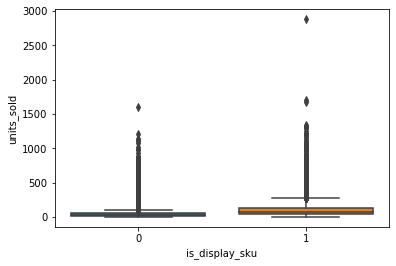

In [22]:
sns.boxplot(x='is_display_sku', y='units_sold', data=X)

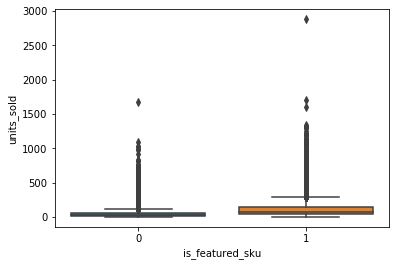

In [23]:
sns.boxplot(x='is_featured_sku', y='units_sold', data=X)

In [24]:
from pycaret.regression import *

In [25]:
X['units_sold'] = np.log(X['units_sold'])
caret_df = setup(X, target='units_sold',
                 numeric_features=['Month', 'is_featured_sku', 'is_display_sku'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5783
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(150150, 14)"
4,Missing Values,True
5,Numeric Features,11
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [26]:
compare_models(fold=10, blacklist=['tr','svm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,0.4601,0.3625,0.6021,0.5551,0.1597,0.1531
1,Extra Trees Regressor,0.4763,0.3897,0.6242,0.5217,0.1657,0.1581
2,Light Gradient Boosting Machine,0.4869,0.3999,0.6323,0.5093,0.1661,0.1629
3,CatBoost Regressor,0.4899,0.4046,0.6361,0.5035,0.1669,0.1639
4,K Neighbors Regressor,0.5128,0.4522,0.6724,0.4451,0.1737,0.1704
5,Gradient Boosting Regressor,0.5283,0.4673,0.6836,0.4265,0.177,0.1768
6,Extreme Gradient Boosting,0.529,0.4685,0.6844,0.4251,0.1772,0.1771
7,Decision Tree,0.5868,0.6,0.7746,0.2636,0.2033,0.1901
8,Ridge Regression,0.6103,0.6103,0.7812,0.2511,0.1967,0.2027
9,Bayesian Ridge,0.6103,0.6103,0.7812,0.2511,0.1967,0.2027


In [27]:
etr = create_model(estimator='rf', fold=10)
pred_holdout = predict_model(etr, X_test)

In [28]:
submission = pd.DataFrame()
submission['record_ID'] = test['record_ID']
submission['units_sold'] = np.exp(pred_holdout['Label']).astype('int')
submission.head()

,record_ID,units_sold
0,212645,38
1,212646,53
2,212647,25
3,212648,30
4,212649,81


In [29]:
submission.to_csv('submission.csv', index=False)